# Pymaceuticals Inc.
---

### Analysis

After running through all the data and creating charts and plots, several inferences can be made:
    (1.) There is basically a 50/50 ratio of female and male mice tested.
    (2.) Mice treated with Capomulin and Ramicane had the smallest average tumor volume. These could be the most effective drug treatments against cancer.
    (3.) For the mouse b128, the tumor volume shrunk over time while being treated with Capomulin. Hopefully this would translate to humans and be an effective cancer treatment.
    (4.) There is a positive correlation between a mouse's weight and the size of the tumor. This means the heavier a mouse weighs, the more likely they will have a large tumor.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how = 'left')

# Display the data table for preview
combined_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
number_of_mice = len(combined_data_df["Mouse ID"].unique())
number_of_mice

249

In [3]:
duplicated_mice=combined_data_df.loc[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint']), "Mouse ID"].unique()
duplicated_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_data_df = combined_data_df[combined_data_df["Mouse ID"].isin(duplicated_mice) == False ]
clean_combined_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_clean_mice = len(clean_combined_data_df["Mouse ID"].unique())
number_of_clean_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor = clean_combined_data_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tumor = clean_combined_data_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance_tumor = clean_combined_data_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_dev_tumor = clean_combined_data_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
std_err_tumor = clean_combined_data_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_statistics_df = pd.DataFrame ({"Mean Tumor Volume": mean_tumor,
                                      "Median Tumor Volume": median_tumor,
                                      "Tumor Volume Variance": variance_tumor,
                                      "Tumor Volume Std. Dev.": std_dev_tumor,
                                      "Tumor Volume Std. Err.": std_err_tumor
                                      })
summary_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
agg_method=clean_combined_data_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

# Using the aggregation method, produce the same summary statistics in a single line.
agg_method

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

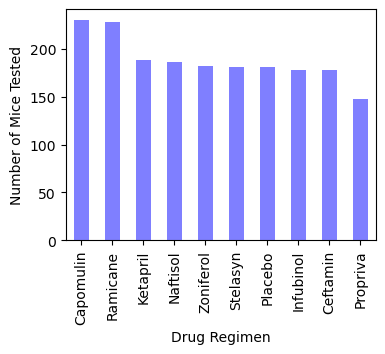

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_timepoints = clean_combined_data_df["Drug Regimen"].value_counts()

total_timepoints.plot(kind="bar",
                      rot= 90,
                      xlabel="Drug Regimen",
                      ylabel="Number of Mice Tested",
                      figsize= (4,3),
                      color= "blue",
                      alpha= 0.5
             )
plt.show()


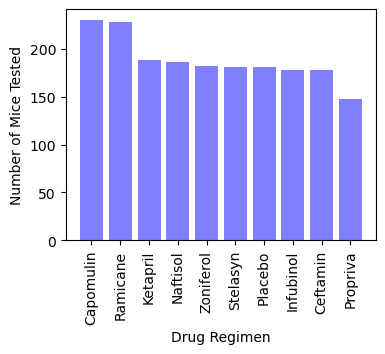

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mice = [230, 228, 188, 186, 182, 181, 181, 178, 178, 148]
x_axis = np.arange(len(mice))

plt.figure(figsize= (4,3))
plt.bar(x_axis, mice, color = "blue", alpha=0.5)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo",
                           "Infubinol", "Ceftamin", "Propriva"], rotation= "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested");


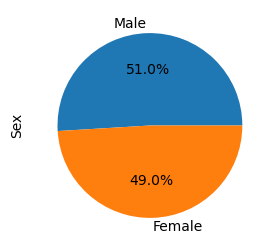

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_v_female = clean_combined_data_df["Sex"].value_counts()

male_v_female.plot(kind="pie",
                  autopct="%1.1f%%",
                   figsize= (4,3)
                  )
plt.show()

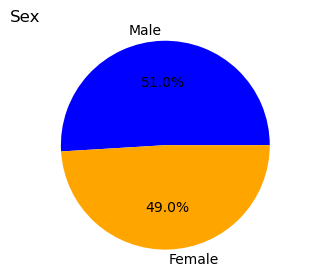

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexes = ["Male", "Female"]
sexes_total = [958, 922]
colors = ["blue", "orange"]

plt.figure(figsize= (4,3))
plt.title("Sex", loc = 'left')
plt.pie(sexes_total, labels = sexes, colors=colors, autopct="%1.1f%%");
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
clean_combined_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint=clean_combined_data_df.groupby(["Mouse ID"])["Timepoint"].max()
greatest_timepoint.reset_index()
greatest_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df=pd.merge(greatest_timepoint, clean_combined_data_df, on= ["Mouse ID", "Timepoint"], how = 'left')
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_data_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    volume=merged_df.loc[merged_df["Drug Regimen"]== drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_data_list.append(volume)
    
    # Determine outliers using upper and lower bounds
    quantiles= volume.quantile([.25, .5, .75])
    lowerq = quantiles[.25]
    upperq = quantiles[.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = volume.loc[(volume < lower_bound) | (volume > upper_bound)]
    print(outliers)

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


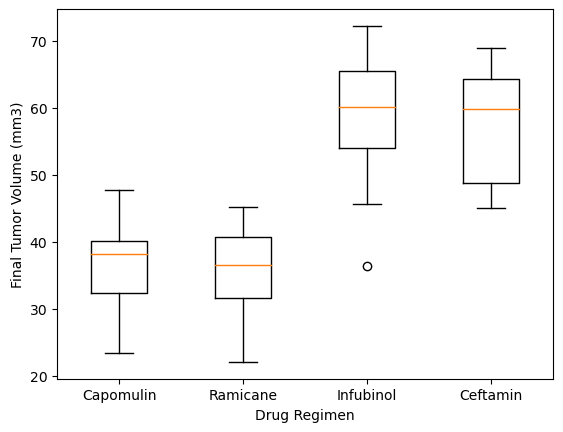

In [22]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_data_list)
plt.xticks([1,2,3,4], labels=drug_list)
plt.show()

## Line and Scatter Plots

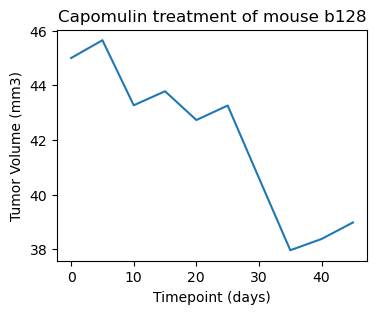

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_combined_data_df.loc[clean_combined_data_df["Drug Regimen"] == "Capomulin"]

b128=capomulin_df.loc[capomulin_df["Mouse ID"] == "b128"]

plt.figure(figsize= (4,3))
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse b128")

plt.plot(b128["Timepoint"], b128["Tumor Volume (mm3)"])
plt.show()


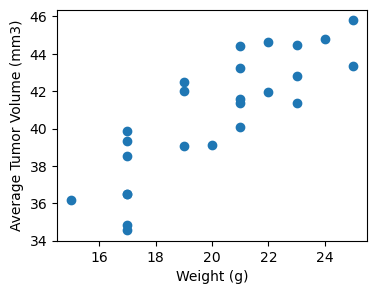

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_weight_per_mouse=capomulin_df.groupby(["Mouse ID"]).mean()["Weight (g)"]
avg_tumor_per_mouse=capomulin_df.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]

plt.figure(figsize= (4,3))
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.scatter(avg_weight_per_mouse, avg_tumor_per_mouse)
plt.show()


## Correlation and Regression

The correlation between both factors is 0.84


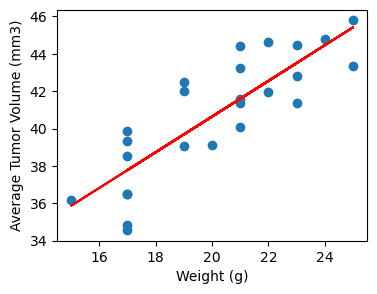

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_slope, mouse_int, mouse_r, mouse_p, mouse_std_err = st.linregress(avg_weight_per_mouse, avg_tumor_per_mouse)
mouse_fit = mouse_slope * avg_weight_per_mouse + mouse_int

correlation = st.pearsonr(avg_weight_per_mouse, avg_tumor_per_mouse)

plt.figure(figsize= (4,3))
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.scatter(avg_weight_per_mouse, avg_tumor_per_mouse)
plt.plot(avg_weight_per_mouse, mouse_fit, color ="red")
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()